In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import load_breast_cancer
cancer1 = load_breast_cancer()

In [3]:
print("Predictors: ", cancer1.feature_names)

Predictors:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print("\nResponse: ", cancer1.target_names)


Response:  ['malignant' 'benign']


In [5]:
import pandas as pd

cancer = pd.DataFrame(cancer1.data, columns=cancer1.feature_names)
cancer.columns = cancer.columns.str.replace(' ','_')

cancer.shape

(569, 30)

In [6]:
# Add a column for the response variable: malignant or benign
cancer['Target'] = cancer1.target

# Take a look at the DataFrame again to double check we added the column properly
cancer.shape

(569, 31)

In [30]:
from sklearn.model_selection import train_test_split

# Select the first 10 columns of our DataFrame that we will use as the predictors in our models
x = cancer.iloc[:,:1]

# Select the response column
y = cancer.Target

# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123)

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg_2 = LogisticRegression(penalty=None, solver = 'newton-cg', max_iter= 150).fit(x_train,y_train)

In [32]:
print("Model Coefficients: ", log_reg_2.coef_)

Model Coefficients:  [[-0.9562445]]


In [33]:
print("\nModel Intercept: ",log_reg_2.intercept_)


Model Intercept:  [14.27514971]


In [34]:
from sklearn.metrics import accuracy_score
# Predict responses
pred_2 = log_reg_2.predict(x_test)
y_predprob=log_reg_2.predict_proba(x_test)
prediction_2 = list(map(round, pred_2))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_2))




Test accuracy =  0.8881118881118881


In [35]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, prediction_2)
print ("\nConfusion Matrix : \n", cm)


Confusion Matrix : 
 [[40 14]
 [ 2 87]]


0.8881118881118881 accuracy
0.8613861386138614 precision

0.9775280898876404 recall

0.9157894736842105 f1 score

0.9509987515605492 AUC


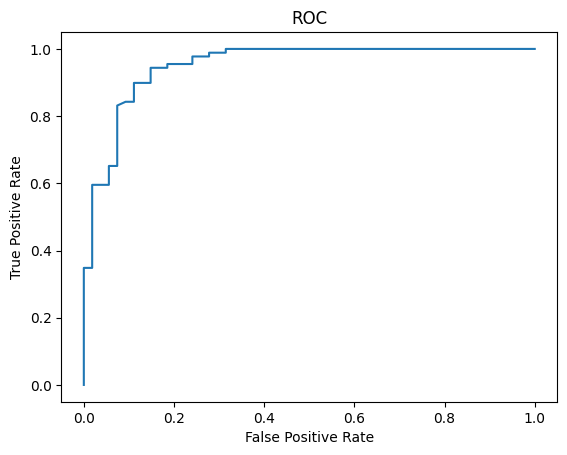

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predprob[:,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
print(accuracy_score(y_test, pred_2),"accuracy")
print(precision_score(y_test,pred_2),"precision")
print()
print(recall_score(y_test,pred_2),"recall")
print()
print(f1_score(y_test,pred_2),"f1 score")
print()
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc,"AUC")